# Text classification with Naive Bayes

In [1]:
# Use the 20newsgroups corpus to classify short documents to categories

from sklearn.datasets import fetch_20newsgroups

# Fetch data and print the categories
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
# Use a few of these categories and get the corresponding training and test sets
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
# Print a sample
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [4]:
# We need to convert text to vectors
# Use the TFIDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


# Create a pipeline to train our model: vectorize text -> naive bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [5]:
# Train model using the training set (and the corresponding labels/categories)
model.fit(train.data, train.target)

# Predfict on test set
labels = model.predict(test.data)

Text(89.133125, 0.5, 'predicted label')

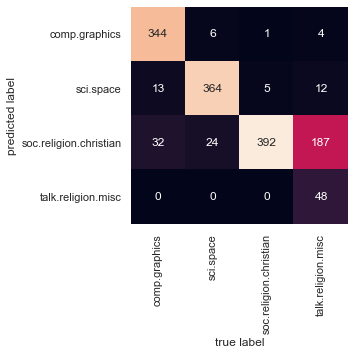

In [6]:
# Get an idea of the performance using the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

matrix = confusion_matrix(test.target, labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [31]:
from sklearn.metrics import classification_report

print(classification_report(
    test.target,
    labels,  
    target_names=train.target_names,
    digits=3
))

                        precision    recall  f1-score   support

         comp.graphics      0.969     0.884     0.925       389
             sci.space      0.924     0.924     0.924       394
soc.religion.christian      0.617     0.985     0.759       398
    talk.religion.misc      1.000     0.191     0.321       251

              accuracy                          0.802      1432
             macro avg      0.878     0.746     0.732      1432
          weighted avg      0.864     0.802     0.773      1432



*It seems that we succesfully separated space talk from computer talk, but there is a confusion between religion talk and christianity talk, which is probably expected. There are very similar areas.*

## Let's remember some basics to explain the above confusion matrix

### Precision (P) = TP / (TP+FP)
### Recall (R) = TP / (TP+FN)
### F1 = 2*P*R/(P+R) = 2TP/(2TP+FP+FN)

#### How many are the TP, FN, FP for this multi-class setting?

| Label |      TP |  FN |  FP |
|-------|---------|-----|-----|
| graphics  | 344 |  45 |  11 |
| space     | 364 |  30 |  30 |
| christian | 392 |   6 | 243 |
| misc      |  48 | 203 |   0 |
|           |     |     |     |
| Total    | 1148 | 284 | 284 |

#### The Macro-avg F1 is the average F1 of all classes
Macro-avg F1 = (0.925+0.924+0.759+0.321)/4 = 0.732

#### The Micro-avg F1 is the result of the pooling of all TP, FN, FP (thus, it is the Accuracy)
Micro-avg F1 = 2*1148 / (2*1148 + 284 + 284) = 0.802
Accuracy = Correct / Total = 1148 / 1432 = 0.802

#### Why the total examples is 1432? 
See Support column above

#### The weighted avg is the average F1 of all classes weighted by the support of each class
Weighted avg F1 = (389/1432)*0.925 + (394/1432)*0.924 + (398/1432)*0.759 + (251/1432)*0.321 = 0.773

In [32]:
# Let's try to predict the category of new texts

# We will define a simple method that given a text string "s", it asks the model to predict 
# the category for that text
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [33]:
predict_category('Huston we are sending a payload to the ISS')

'sci.space'

In [34]:
predict_category('I am in a discussion between islam and christianity')

'soc.religion.christian'

In [35]:
predict_category('the screen resolution is very low for this setting')

'comp.graphics'

In [36]:
predict_category('this new card should be very fast and I cannot wait to see the new unreal graphic engine')

'comp.graphics'

In [37]:
predict_category('We are ready to launch in the countdown to 10')

'sci.space'